In [1]:
# check env
import os
import torch
os.environ["OPENCV_IO_ENABLE_OPENEXR"]="1"

print("PyTorch version: %s" % torch.__version__)

if not torch.cuda.is_available():
    print("Running on CPU")
else:
    print("Runing on GPU %s" % torch.cuda.get_device_name())

PyTorch version: 2.0.1+cu118
Runing on GPU NVIDIA GeForce RTX 3090


In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 8E28-94E5

 Directory of c:\Users\CanonUser\OneDrive - CanonUSA365\Documents\GitHub\pcd_generation\depth_map\unimatch

05/17/2025  09:36 AM    <DIR>          .
05/19/2025  10:31 AM    <DIR>          ..
08/26/2024  03:11 PM    <DIR>          .git
10/21/2024  01:53 PM    <DIR>          __pycache__
10/24/2024  05:18 PM        11,645,363 Camera_1_flo.ply
08/13/2024  03:27 PM             2,922 conda_environment.yml
08/26/2024  03:11 PM    <DIR>          dataloader
08/13/2024  03:27 PM             3,372 DATASETS.md
10/21/2024  01:34 PM    <DIR>          demo
05/16/2025  12:29 PM         1,061,544 depth_flow.ipynb
01/03/2025  04:46 PM            60,928 depth_flow_karate.ipynb
10/24/2024  05:25 PM         3,497,679 depth_from_flo.mp4
11/14/2024  05:32 PM           188,901 depth_gen.ipynb
08/13/2024  03:27 PM            16,265 evaluate_depth.py
08/13/2024  03:27 PM            32,673 evaluate_flow.py
08/20/2024  02:06 PM            31,949

In [3]:
# we assume the downloaded model weights are located under the pretrained directory.
%mkdir pretrained

A subdirectory or file pretrained already exists.


In [8]:
#!wget -P pretrained https://s3.eu-central-1.amazonaws.com/avg-projects/unimatch/pretrained/gmflow-scale2-regrefine6-mixdata-train320x576-4e7b215d.pth
#!wget -P pretrained https://s3.eu-central-1.amazonaws.com/avg-projects/unimatch/pretrained/gmflow-scale2-regrefine6-kitti15-25b554d7.pth
#wget -P pretrained https://s3.eu-central-1.amazonaws.com/avg-projects/unimatch/pretrained/gmstereo-scale2-regrefine3-resumeflowthings-middleburyfthighres-a82bec03.pth
#!wget -P pretrained https://s3.eu-central-1.amazonaws.com/avg-projects/unimatch/pretrained/gmdepth-scale1-regrefine1-resumeflowthings-scannet-90325722.pth
#run this in powershell: Invoke-WebRequest -Uri "https://s3.eu-central-1.amazonaws.com/avg-projects/unimatch/pretrained/gmstereo-scale2-regrefine3-resumeflowthings-middleburyfthighres-a82bec03.pth" -OutFile "pretrained\gmstereo-scale2-regrefine3-resumeflowthings-middleburyfthighres-a82bec03.pth"

'Invoke-WebRequest' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
# check downloading
%ls pretrained

 Volume in drive C has no label.
 Volume Serial Number is 8E28-94E5

 Directory of c:\Users\CanonUser\OneDrive - CanonUSA365\Documents\GitHub\pcd_generation\depth_map\unimatch\pretrained

08/26/2024  03:11 PM    <DIR>          .
08/26/2024  03:06 PM    <DIR>          ..
08/13/2024  03:45 PM        29,475,089 gmstereo-scale2-regrefine3-resumeflowthings-middleburyfthighres-a82bec03.pth
               1 File(s)     29,475,089 bytes
               2 Dir(s)  455,231,795,200 bytes free


In [4]:
# visualization utils
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display, HTML
from base64 import b64encode

plt.rcParams["figure.figsize"] = (30, 5)


def vis_img(img):
    plt.imshow(img)
    plt.axis("off")
    plt.show()


def vis_video(video_path):
    mp4 = open(video_path, "rb").read()
    data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
    return HTML(
        """
  <video width=600 controls>
        <source src="%s" type="video/mp4">
  </video>
  """
        % data_url
    )

In [8]:


os.makedirs("../../output/UniMatch/sample", exist_ok=True)

In [3]:
from glob import glob
inference_dir = "demo/input/stereo/resize"#../../data/stereo/pose_z_4m/rgb"
filenames = sorted(glob(inference_dir + '/*.png') + glob(inference_dir + '/*.jpg'))

left_filenames = filenames[::2]
right_filenames = filenames[1::2]
print(right_filenames)

['demo/input/stereo/resize\\rectified_img2_resized.png']


In [5]:
# inference on a stereo pair
import time
st_time = time.time()
!python main_stereo.py \
--save_pfm_disp \
--pred_bidir_disp \
--inference_dir demo/input/stereo/ \
--output_path demo/output/stereo \
--resume pretrained/gmstereo-scale2-regrefine3-resumeflowthings-middleburyfthighres-a82bec03.pth \
--padding_factor 32 \
--upsample_factor 4 \
--num_scales 2 \
--attn_type self_swin2d_cross_swin1d \
--attn_splits_list 2 8 \
--corr_radius_list -1 4 \
--prop_radius_list -1 1 \
--reg_refine \
--num_reg_refine 3 \
--inference_size 1024 1536 \

print("processing time =", time.time() - st_time)

"""
--inference_size 1024 1536 \
"""

=> Load checkpoint: pretrained/gmstereo-scale2-regrefine3-resumeflowthings-middleburyfthighres-a82bec03.pth
1 test samples found
Done!
processing time = 18.591483116149902


c:\Users\CanonUser\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


'\n--inference_size 1024 1536 '

# Get camera information

In [230]:
import sys
parent_dir = os.path.join(os.getcwd(), '..\\..\\')
sys.path.append(parent_dir)
from utils.cam_info_extraction import Camera_info
json_path = '../../data/stereo/pose_z_4m/CameraData.json'
camera_id_l = '21'
camera_id_r = '20'

In [231]:
camera_data_l = Camera_info(json_path, camera_id_l)
camera_data_r = Camera_info(json_path, camera_id_r)

# Get disparity data and calculate their depths

In [232]:
from utils.depth_from_disparity import read_disparity
disparity_path = f'../../output/UniMatch/pose_z_4m/Camera_{int(camera_id_r):03d}_RGB_disp.pfm'
disparity = read_disparity(disparity_path)

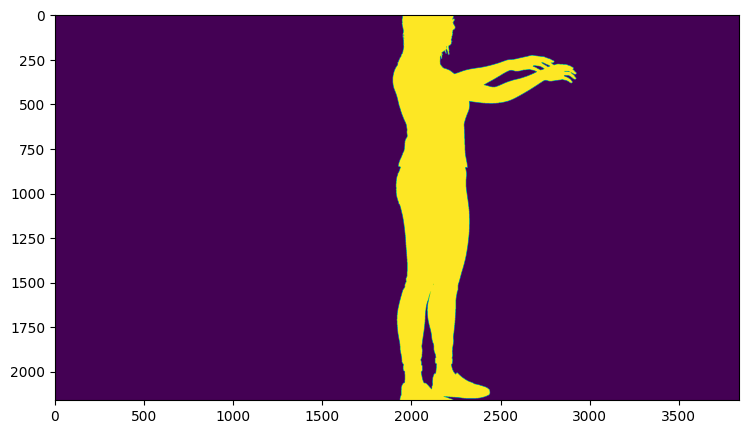

In [233]:
from utils.depth_from_disparity import depth_disparity_cal
import cv2
baseline = camera_data_l.baseline_mm(camera_data_r)
focal_length,_ = camera_data_l.focal_length_pixel(disparity.shape[1], disparity.shape[0])
depth = depth_disparity_cal(disparity, baseline, focal_length, factor=1)

mask_path = f'../../data/stereo/pose_z_4m/mask/Camera_{int(camera_id_r):03d}_Mask.png'
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(mask)

# Unproject depth to 3D

In [234]:
from scipy.spatial.transform import Rotation as R
def unproject_depth_map(depth_map, K, near=None, far=None, M=None, mask=None, rgb=None):
    # Unproject the depth map to 3D points in the local world coordinate system
    img_h, img_w = depth_map.shape

    if M is None:
        M = np.eye(4)
    if mask is None:
        mask = np.ones_like(depth_map)
    valid_inds = (mask > 0) & (depth < 6000) #an arbitrary value to prevent from processing too much hair

    if near is None and far is None:
        depth_vals = depth_map[valid_inds].copy()/10
    else:
        depth_vals = depth_map[valid_inds] / 255 * (far-near) + near

    x, y = np.meshgrid(np.arange(img_w), np.arange(img_h))
    x = x[valid_inds]
    y = img_h - y[valid_inds]
    z = depth_vals
    img_points = np.array([x, y, np.ones_like(x)])*z
    print(img_points.shape)

    # unproject depth map to points in the world
    world_points = np.linalg.inv(K) @ img_points #3 by N
    world_points = np.concatenate([world_points, np.ones((1, world_points.shape[1]))], axis=0)
    print(world_points.shape)

    #rotate back to the world coordinate system
    world_points = np.linalg.inv(M) @ world_points

    if rgb is not None:
        rgb = rgb[valid_inds]
    else:
        rgb = np.ones((3, world_points.shape[1])) * 128

    return world_points[:3,:], rgb

def get_camera_poses(cam_data):

    roll = cam_data["Camera World Rotation"]["R"]
    pitch = cam_data["Camera World Rotation"]["P"]
    yaw = -cam_data["Camera World Rotation"]["Y"] #unreal engine is left-handed rotation, so we need to negate the yaw. 

    y0 = cam_data["Camera World Position"]["Y"]
    z0 = cam_data["Camera World Position"]["Z"]
    x0 = cam_data["Camera World Position"]["X"]
    #cmPerPix = cam_data['Filmback']['SensorWidth'] / image_width * 0.1 # 0.1 is the scale factor to convert cm to mm. don't need this

    roll, pitch, yaw = np.deg2rad([roll, pitch, yaw])
    rotation = R.from_euler("zxy", [roll, pitch, yaw]) # rotate in the order of z (depth), x(horizontal), y(vertical) extrinsically
    rotation_matrix = rotation.as_matrix()

    x = y0; y = z0; z = x0; # camera position in world coordinate; Values are swapped to match the world coordinate system. see notes above
    RT = np.eye(4)
    RT[:3, :3] = rotation_matrix
    #rotation_matrix = RT.copy()

    T = np.array([x, y, z])# 
    RT[:3, 3] = -rotation_matrix @ T # R @ T gives the coordinates the camera in the roated coordinate system inline with the camera orientation.
                                        # We need to negate it to get the origine's new coordinates if we were to then move the system to the camera's position.
                                        # The resultant matrix is the extrinsic matrix of the camera that can be used to transform points from world to camera coordinates.
        
    return RT, rotation_matrix, T

In [235]:
camera_data_r.cam_data

{'Camera World Position': {'X': 189.1746702327651,
  'Y': 352.6601786202996,
  'Z': 75},
 'Camera World Rotation': {'P': 0, 'Y': -119.9999972589655, 'R': 0},
 'Filmback': {'SensorWidth (mm)': 23.760000228881836,
  'SensorHeight (mm)': 13.364999771118164,
  'SensorResolutionWidth (pixels)': 3840,
  'SensorResolutionHeight (pixels)': 2160,
  'SensorAspectRatio': 1.7777777910232544},
 'Lens': {'MinFocalLength (mm)': 4,
  'MaxFocalLength (mm)': 1000,
  'Horizontal Field of View (degrees)': 37.49735641479492},
 'Other': {'Near Clip Plane (cm)': 0.10000000149011612,
  'Far Clip Plane (cm)': 800}}

# Check if transformation makes sense

In [236]:
# To project a world point (x_i, y_i, z_i) to image coordinates:
world_point = np.array([0, 0, 0, 1])  # Example world coordinates of the object
M, Rot, T = get_camera_poses(camera_data_r.cam_data)
print(f'transformation matrix: \n{M}')
print(f'camera position: {T}')
print(f'rotation matrix: \n{Rot}')
K = np.eye(3)
K[0, 0] = focal_length
K[1, 1] = focal_length
K[0, 2] = depth.shape[1] / 2.0
K[1, 2] = depth.shape[0] / 2.0
camera_point = M @ world_point
print(f'camera_point: {camera_point}')
camera_point = K @ camera_point[:3]
camera_point /= camera_point[2]  # Normalize by the third component

# Image coordinates (pixel)
u = camera_point[0]
v = image_height - camera_point[1]
center_coordinates = (int(u), int(v))
center_coordinates

transformation matrix: 
[[ -0.49999996   0.           0.86602543  12.5       ]
 [  0.           1.           0.         -75.        ]
 [ -0.86602543   0.          -0.49999996 400.0000093 ]
 [  0.           0.           0.           1.        ]]
camera position: [352.66017862  75.         189.17467023]
rotation matrix: 
[[-0.49999996  0.          0.86602543]
 [ 0.          1.          0.        ]
 [-0.86602543  0.         -0.49999996]]
camera_point: [ 12.5       -75.        400.0000093   1.       ]


(2096, 2140)

(3, 792454)
(3, 792454)


(array([4.00000e+00, 1.00000e+00, 3.00000e+00, 4.00000e+00, 3.00000e+00,
        2.00000e+00, 5.00000e+00, 1.00000e+01, 7.00000e+00, 1.00000e+01,
        1.00000e+01, 8.00000e+00, 8.00000e+00, 1.30000e+01, 1.20000e+01,
        1.50000e+01, 2.30000e+01, 2.30000e+01, 3.40000e+01, 2.70000e+01,
        3.40000e+01, 7.50000e+01, 6.90000e+01, 5.00000e+01, 4.30000e+01,
        4.40000e+01, 5.10000e+01, 6.00000e+01, 6.10000e+01, 6.30000e+01,
        7.90000e+01, 6.20000e+01, 5.20000e+01, 4.80000e+01, 5.00000e+01,
        6.60000e+01, 5.50000e+01, 5.00000e+01, 5.80000e+01, 8.40000e+01,
        6.00000e+01, 4.70000e+01, 5.50000e+01, 7.60000e+01, 8.30000e+01,
        1.20000e+02, 1.14000e+02, 1.04000e+02, 1.24000e+02, 1.13000e+02,
        1.05000e+02, 1.60000e+02, 2.07000e+02, 1.83000e+02, 1.92000e+02,
        2.57000e+02, 1.96000e+02, 2.49000e+02, 2.84000e+02, 2.80000e+02,
        2.63000e+02, 2.50000e+02, 2.11000e+02, 1.92000e+02, 1.74000e+02,
        2.10000e+02, 1.90000e+02, 1.83000e+02, 2.16

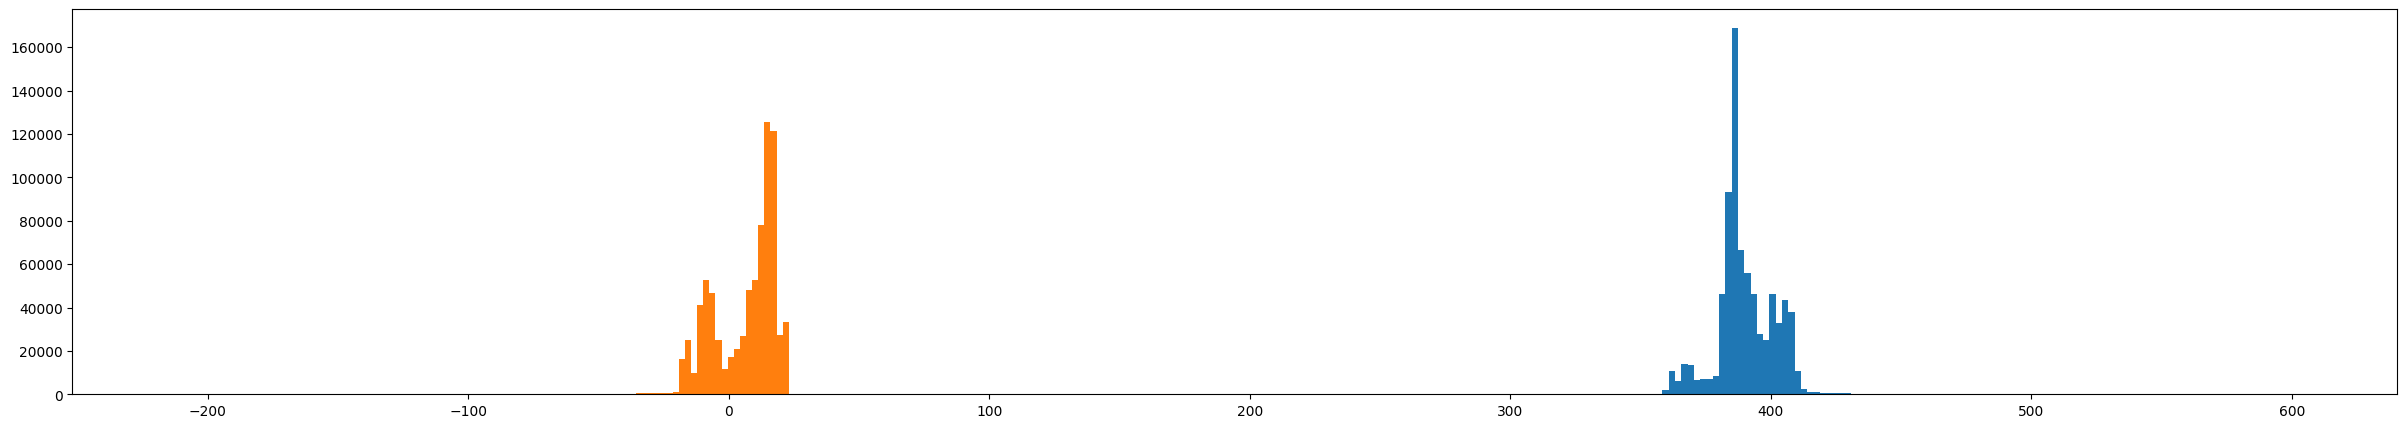

In [237]:
valid_inds = (mask > 0) & (depth < 6000) #an arbitrary value to prevent from processing too much hair
depth_vals = depth[valid_inds].copy()/10


x, y = np.meshgrid(np.arange(image_width), np.arange(image_height))
x = x[valid_inds]
plt.hist(depth_vals, bins=100)
y = image_height - y[valid_inds]
z = depth_vals
x = x * z
y = y * z
print(np.array([x, y, z]).shape)
position_world = np.linalg.inv(K) @ (np.array([x, y, z]))
print(position_world.shape)
position_world = np.vstack((position_world, np.ones((1,len(z)))))
M, _, _ = get_camera_poses(camera_data_r.cam_data)
position_world = np.linalg.inv(M) @ position_world

plt.hist(position_world[0,:], bins=100)


In [238]:
image_width = depth.shape[1]
image_height = depth.shape[0]
x = 2250; y = 1433
y = image_height - y
z = 400
x = x * z
y = y * z
K = np.eye(3)
K[0, 0] = focal_length
K[1, 1] = focal_length
K[0, 2] = depth.shape[1] / 2.0
K[1, 2] = depth.shape[0] / 2.0
position_world = np.linalg.inv(K) @ (np.array([x, y, z]).T)
print(position_world[:,None])
position_world = np.vstack((position_world[:,None], np.ones((1,1))))
M, _, _ = get_camera_poses(camera_data_r.cam_data)
np.linalg.inv(M) @ position_world

[[ 23.33571152]
 [-24.96213989]
 [400.        ]]


array([[-5.41784725],
       [50.03786011],
       [ 9.38400635],
       [ 1.        ]])

In [239]:
def get_points_from_depth(x, y, z, fx, fy, cx, cy):
    x = (x - cx) * z / fx
    y = (y - cy) * z / fy
    points = np.stack([x, -y, -z], axis=-1)

    return points[:, :3]

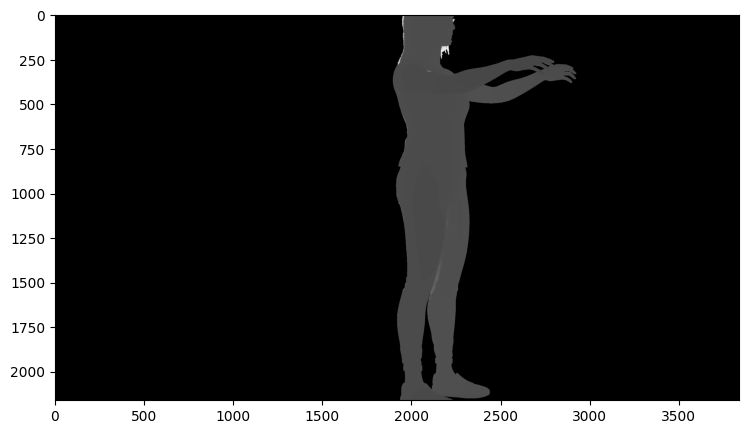

In [240]:
_, binary_mask = cv2.threshold(mask, 200, 1, cv2.THRESH_BINARY)
plt.imshow(binary_mask*depth, cmap='gray')

In [241]:
K = np.eye(3)
K[0, 0] = focal_length
K[1, 1] = focal_length
K[0, 2] = disparity.shape[1] / 2.0
K[1, 2] = disparity.shape[0] / 2.0

img_r = cv2.imread(f'../../data/stereo/pose_z_4m/rgb/Camera_{int(camera_id_r):03d}_RGB.png')
M, _, _ = get_camera_poses(camera_data_r.cam_data)
world_points, colors = unproject_depth_map(depth, K, None, None, M, None, cv2.cvtColor(img_r, cv2.COLOR_BGR2RGB))
"""valid_inds = (mask > 0) & (depth < 6000) #an arbitrary value to prevent from processing hair

depth_vals = depth[valid_inds].copy()

x, y = np.meshgrid(np.arange(disparity.shape[1]), np.arange(disparity.shape[0]))
x = x[valid_inds]
y = y[valid_inds]
z = depth_vals

world_points = get_points_from_depth(x, y, z, focal_length, focal_length, disparity.shape[1] / 2.0, disparity.shape[0] / 2.0)
colors = cv2.cvtColor(img_r, cv2.COLOR_BGR2RGB)[valid_inds]"""

(3, 2133006)
(4, 2133006)


'valid_inds = (mask > 0) & (depth < 6000) #an arbitrary value to prevent from processing hair\n\ndepth_vals = depth[valid_inds].copy()\n\nx, y = np.meshgrid(np.arange(disparity.shape[1]), np.arange(disparity.shape[0]))\nx = x[valid_inds]\ny = y[valid_inds]\nz = depth_vals\n\nworld_points = get_points_from_depth(x, y, z, focal_length, focal_length, disparity.shape[1] / 2.0, disparity.shape[0] / 2.0)\ncolors = cv2.cvtColor(img_r, cv2.COLOR_BGR2RGB)[valid_inds]'

In [105]:
world_points.T.mean(axis=0)

array([  956.33814157,  -491.94254093, -2308.0499395 ])

In [71]:
world_points.T.mean(axis=0)

array([   -7.67267956,  -145.49125181, -2308.0499395 ])

In [89]:
world_points.T.mean(axis=0)

array([  -85.48100318,  -365.31965451, -4064.85756813])

(array([2.30200e+03, 9.94400e+03, 4.42900e+03, 1.90100e+03, 8.54000e+02,
        7.40000e+02, 1.34900e+03, 2.15100e+03, 3.15600e+03, 4.58500e+03,
        3.71500e+03, 3.38000e+03, 2.90200e+03, 1.08000e+03, 5.07000e+02,
        6.14000e+02, 2.66810e+04, 2.53106e+05, 1.39930e+05, 7.34970e+04,
        4.69140e+04, 2.64110e+04, 9.33900e+03, 2.55800e+03, 1.26700e+03,
        9.65000e+02, 5.95000e+02, 5.79000e+02, 3.02000e+02, 2.59000e+02,
        2.70000e+02, 2.04000e+02, 2.00000e+02, 2.09000e+02, 1.78000e+02,
        1.55000e+02, 1.63000e+02, 1.66000e+02, 1.32000e+02, 1.74000e+02,
        1.57000e+02, 1.63000e+02, 1.24000e+02, 1.48000e+02, 1.49000e+02,
        1.41000e+02, 1.07000e+02, 1.15000e+02, 1.41000e+02, 1.16000e+02,
        1.24000e+02, 1.18000e+02, 8.70000e+01, 9.60000e+01, 7.80000e+01,
        1.00000e+02, 9.00000e+01, 8.70000e+01, 7.50000e+01, 7.30000e+01,
        6.10000e+01, 6.50000e+01, 6.60000e+01, 7.60000e+01, 5.70000e+01,
        5.80000e+01, 5.60000e+01, 5.30000e+01, 3.60

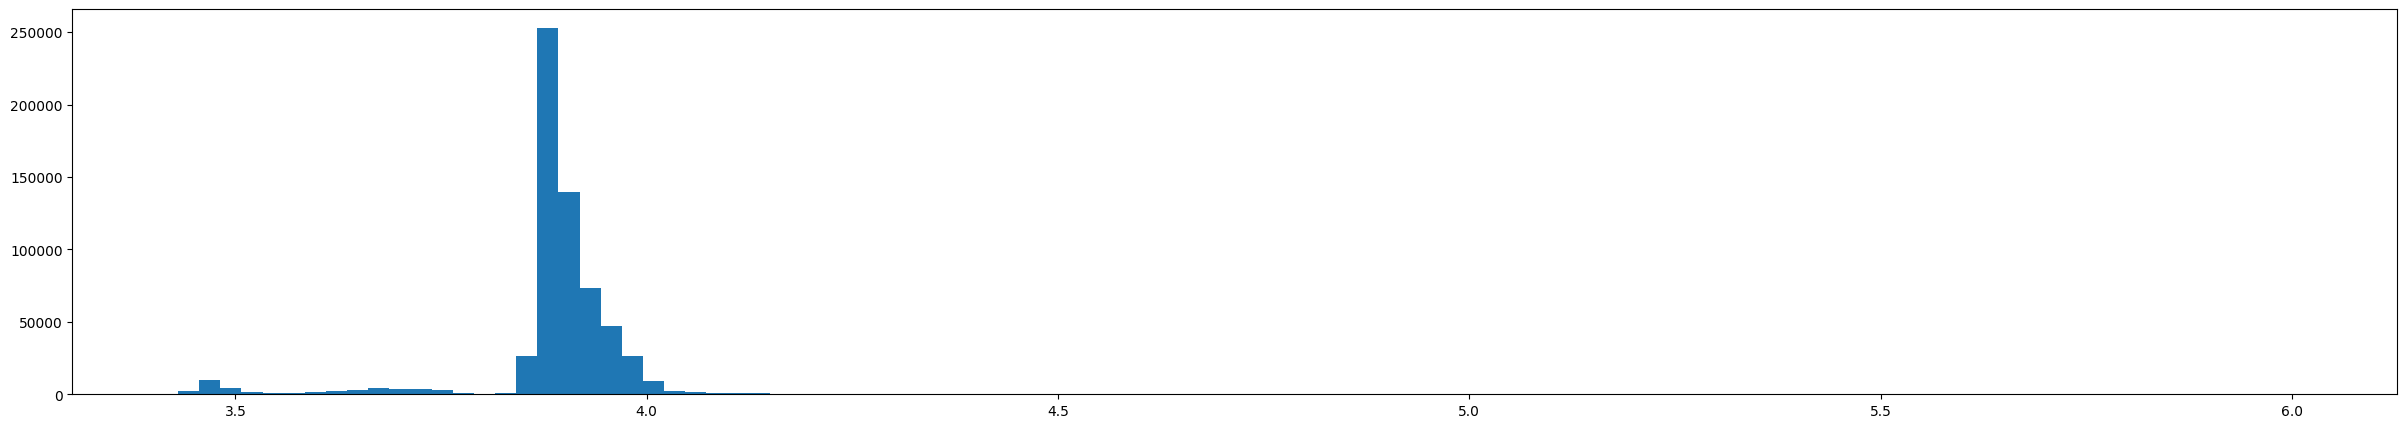

In [28]:
plt.hist(depth[(mask>0) & (depth<6000)]/1000,bins=100)

(array([1.19000e+02, 2.79000e+02, 4.94000e+02, 7.00000e+02, 9.10000e+02,
        1.13400e+03, 1.37200e+03, 1.67700e+03, 1.95400e+03, 2.30500e+03,
        2.59400e+03, 2.93200e+03, 3.30000e+03, 3.76000e+03, 4.24300e+03,
        4.82100e+03, 5.41100e+03, 6.07500e+03, 6.75400e+03, 7.54600e+03,
        8.37300e+03, 9.29400e+03, 1.02010e+04, 1.12680e+04, 1.27450e+04,
        1.41700e+04, 1.55570e+04, 1.74720e+04, 1.98940e+04, 2.20460e+04,
        2.56510e+04, 2.91110e+04, 3.30320e+04, 3.75630e+04, 4.34090e+04,
        5.02940e+04, 5.85060e+04, 6.83320e+04, 8.16540e+04, 9.02610e+04,
        9.10420e+04, 9.02170e+04, 9.06560e+04, 9.06850e+04, 9.07950e+04,
        9.08260e+04, 9.06230e+04, 9.07150e+04, 9.96280e+04, 1.63266e+05,
        1.63483e+05, 1.42583e+05, 1.19975e+05, 1.19599e+05, 1.40732e+05,
        1.66027e+05, 1.64415e+05, 9.97180e+04, 8.53420e+04, 8.85660e+04,
        8.88600e+04, 8.54840e+04, 7.07570e+04, 5.98070e+04, 5.12290e+04,
        4.43620e+04, 3.82100e+04, 3.29060e+04, 2.88

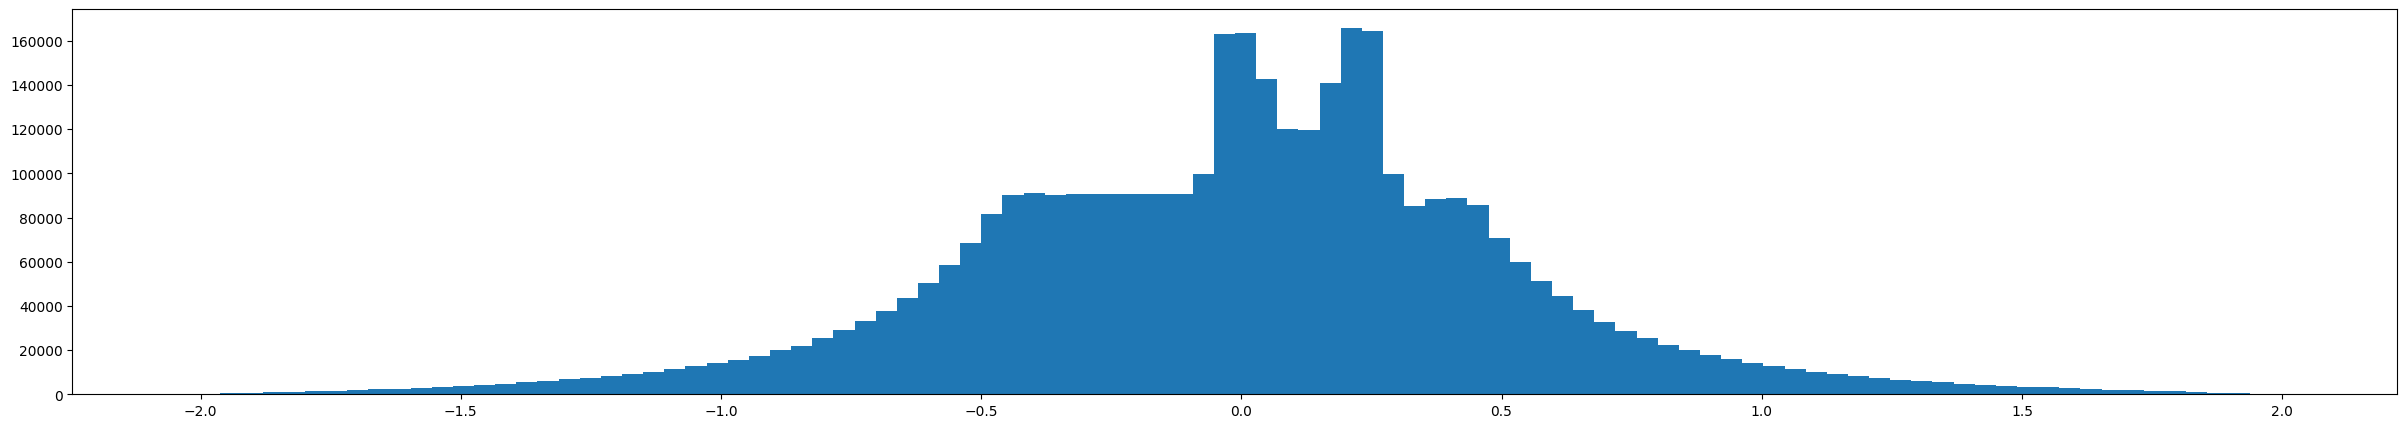

In [144]:
plt.hist(world_points.T[:,0]/1000, bins=100)

(array([1.42000e+02, 3.37000e+02, 5.09000e+02, 7.03000e+02, 9.40000e+02,
        1.17100e+03, 1.41600e+03, 1.66900e+03, 1.96600e+03, 2.27600e+03,
        2.64600e+03, 3.04600e+03, 3.48800e+03, 3.90000e+03, 4.41000e+03,
        4.93700e+03, 5.48900e+03, 6.17100e+03, 6.80800e+03, 7.52900e+03,
        8.36800e+03, 9.36800e+03, 1.04060e+04, 1.15940e+04, 1.29780e+04,
        1.46330e+04, 1.62130e+04, 1.76490e+04, 1.97750e+04, 2.32500e+04,
        2.65500e+04, 2.89460e+04, 3.24200e+04, 3.64620e+04, 4.17620e+04,
        4.88140e+04, 8.45270e+04, 1.50570e+05, 1.54245e+05, 1.35803e+05,
        1.17336e+05, 1.21671e+05, 1.43766e+05, 1.68898e+05, 1.59305e+05,
        9.22080e+04, 9.07070e+04, 9.07410e+04, 9.06930e+04, 9.06840e+04,
        9.05400e+04, 9.05740e+04, 9.06470e+04, 9.05940e+04, 9.05750e+04,
        9.06450e+04, 9.04400e+04, 8.96350e+04, 8.86960e+04, 8.82960e+04,
        8.78550e+04, 8.13080e+04, 6.83850e+04, 5.78290e+04, 4.95620e+04,
        4.36550e+04, 3.79850e+04, 3.33730e+04, 2.90

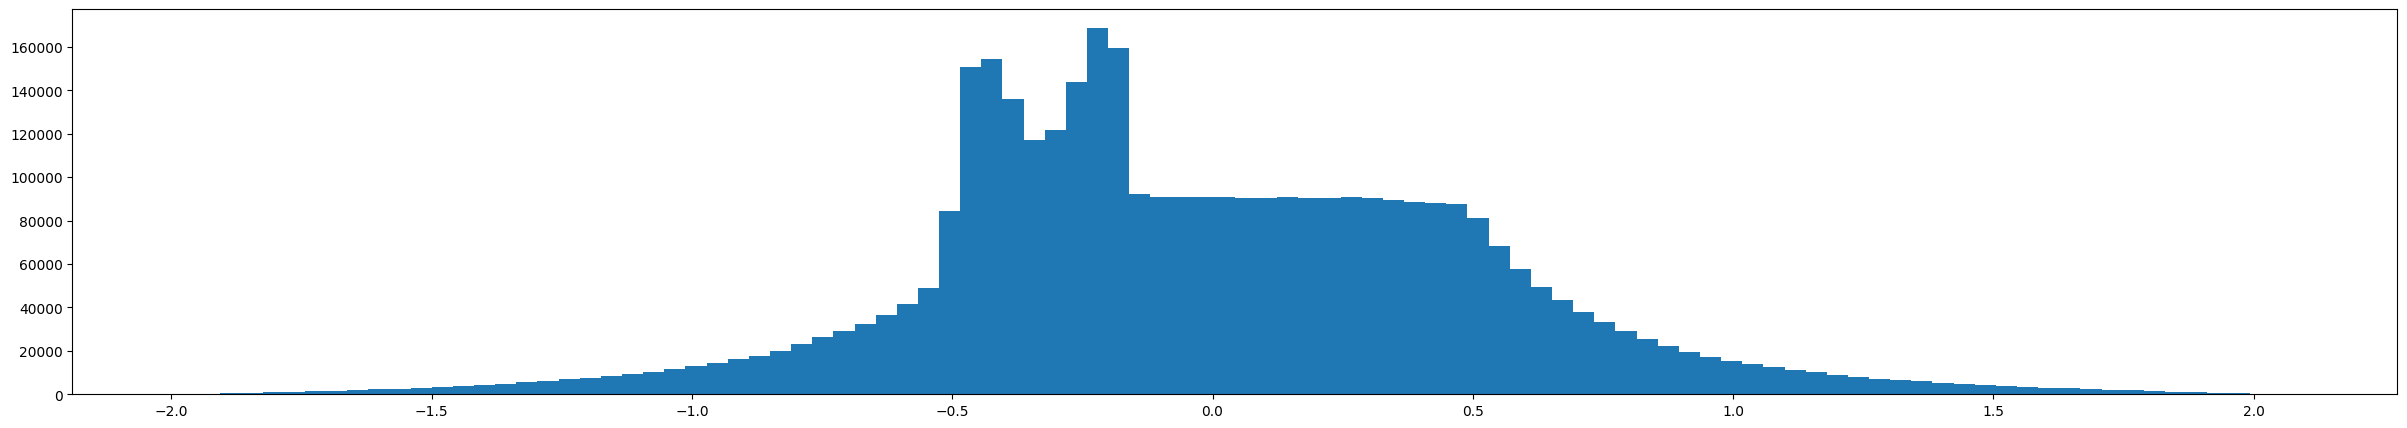

In [153]:
plt.hist(world_points.T[:,0]/1000, bins=100)

# Visualization

In [242]:
import open3d as o3d

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(world_points.T)
pcd.colors = o3d.utility.Vector3dVector(colors/255.0)
o3d.io.write_point_cloud(f"Camera_020.ply", pcd)
print(pcd)
o3d.visualization.draw_geometries([pcd])

PointCloud with 2133006 points.


# Evaluation based on ndc coordinates

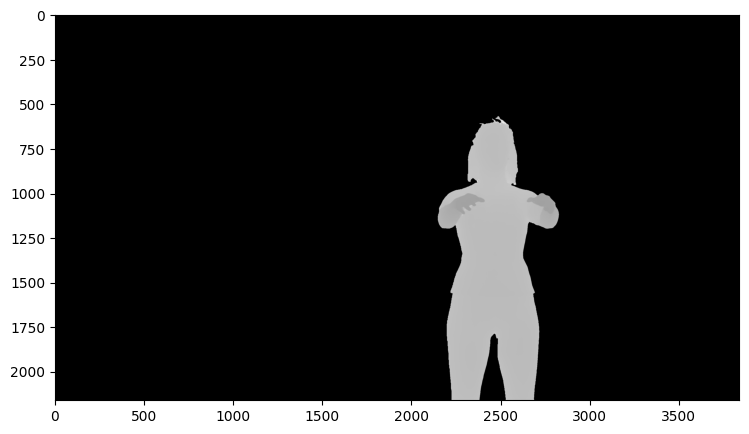

In [26]:
gt_path = f'../../data/stereo/pose_z_4m/gt/Camera_{camera_id_r}_RGBD.exr'
gt = cv2.imread(gt_path,  cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)  

valid_ind = (mask > 0) & (depth < 5000) & (depth > 0)
depth_body = depth.copy()
depth_body[~valid_ind] = 800

plt.imshow(depth_body, cmap='gray')

In [18]:
def compute_eval_metrics(gt, pred, mask, depth_range=(2.0, 5.0), x_range = (0.5, 0.8)):
    # both gt and pred should be in meters
    valid_mask = (mask > 0) & (pred < depth_range[1])
    gt_valid = gt[valid_mask]
    pred_valid = pred[valid_mask]

    #calculate rmse
    abs_diff = np.abs(gt_valid - pred_valid)
    rmse = np.sqrt(np.mean(abs_diff ** 2))

    #calculate mean squared error in proportion to total variance of the ground truth
    sq_rel = np.mean((pred_valid - gt_valid) ** 2) / np.var(gt_valid)

    #calculate correlation coefficient
    gt_body = gt.copy()
    pred_body = pred.copy()
    gt_body[~valid_mask] = 0
    pred_body[~valid_mask] = 0

    # calculate correlation matrix row by row
    correlations = []
    range_min = int(x_range[0] * pred_body.shape[1])
    range_max = int(x_range[1] * pred_body.shape[1])
    for row_p, rwo_g in zip(pred_body, gt_body):
        # Count the number of zeros
        validpxls = np.count_nonzero(row_p)
        if validpxls > 50: # arbitrary threshold to colacuate correlation
            correlation_matrix = np.corrcoef(row_p[range_min:range_max], rwo_g[range_min:range_max])
            correlation_coefficient = correlation_matrix[0, 1]
            correlations.append(correlation_coefficient)
    return rmse, sq_rel, np.mean(correlations)

In [19]:
rmse, sq_rel, corr = compute_eval_metrics(gt/100, depth/1000, mask, depth_range=(2.0, 5.0), x_range = (0.5, 0.8))

In [20]:
rmse, sq_rel, corr

(0.09044551, 0.5110946, 0.9995255703457498)

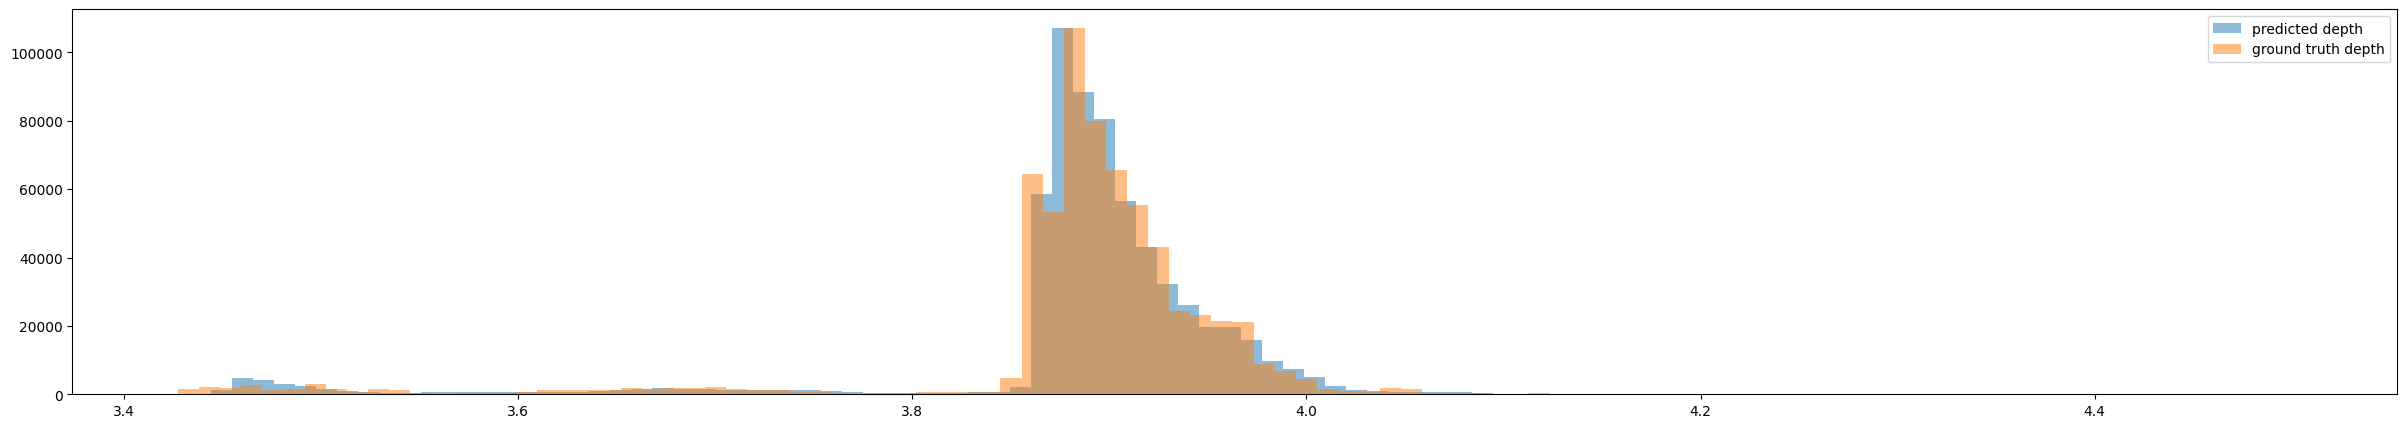

In [10]:
plt.hist(depth[(mask>0) & (depth < 4500) & (depth > 0)]/1000,bins=100, alpha=0.5, label='predicted depth')
plt.hist(gt[(mask>0) & (gt < 450) & (gt > 0)]/100,bins=100, alpha=0.5, label='ground truth depth')
plt.legend()
plt.show()

In [30]:
plt.plot(gt[1050,2000:3000]/100)
plt.plot(depth[1050,2000:3000]/1000)
plt.ylim(3, 6)

TypeError: 'NoneType' object is not subscriptable

In [13]:
# Compute the correlation coefficient matrix
correlation_matrix = np.corrcoef(gt[1000,2000:3000]/100, depth[1000,2000:3000]/1000)

# Extract the correlation coefficient
correlation_coefficient = correlation_matrix[0, 1]

print("Correlation coefficient:", correlation_coefficient)

Correlation coefficient: 0.9762746006360462


In [63]:
# Compute the 2D correlation
from scipy.signal import correlate2d
correlation_result = correlate2d(gt, depth, mode='full')

print("2D Correlation result:\n", correlation_result)

(array([4.47500e+04, 5.82343e+05, 2.22500e+03, 1.24000e+03, 7.73000e+02,
        7.36000e+02, 5.40000e+02, 3.79000e+02, 3.54000e+02, 4.17000e+02,
        3.29000e+02, 3.07000e+02, 2.54000e+02, 1.93000e+02, 1.64000e+02,
        1.70000e+02, 1.57000e+02, 1.52000e+02, 1.20000e+02, 1.45000e+02,
        1.25000e+02, 1.21000e+02, 1.09000e+02, 9.00000e+01, 1.20000e+02,
        7.40000e+01, 7.90000e+01, 7.20000e+01, 7.40000e+01, 7.40000e+01,
        7.20000e+01, 7.00000e+01, 7.30000e+01, 7.20000e+01, 8.00000e+01,
        8.40000e+01, 8.50000e+01, 9.30000e+01, 1.28000e+02, 1.61000e+02,
        1.34000e+02, 1.33000e+02, 1.26000e+02, 1.24000e+02, 9.10000e+01,
        1.02000e+02, 8.90000e+01, 9.10000e+01, 1.10000e+02, 8.60000e+01,
        1.05000e+02, 8.70000e+01, 7.40000e+01, 7.50000e+01, 7.20000e+01,
        8.00000e+01, 1.03000e+02, 9.00000e+01, 1.04000e+02, 6.90000e+01,
        1.06000e+02, 1.20000e+02, 1.38000e+02, 1.69000e+02, 1.56000e+02,
        1.39000e+02, 1.98000e+02, 2.26000e+02, 2.31

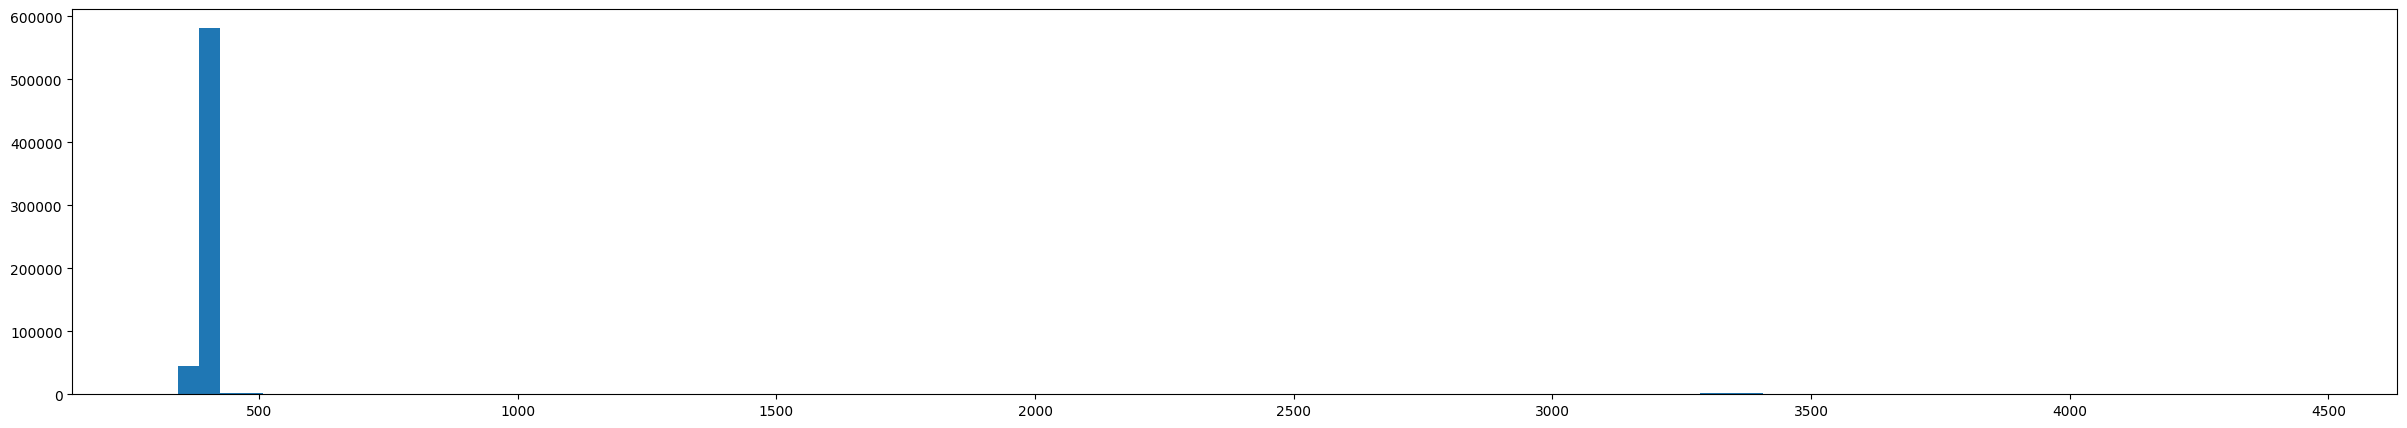

In [32]:
plt.hist(depth[mask>0]/10, bins=100)

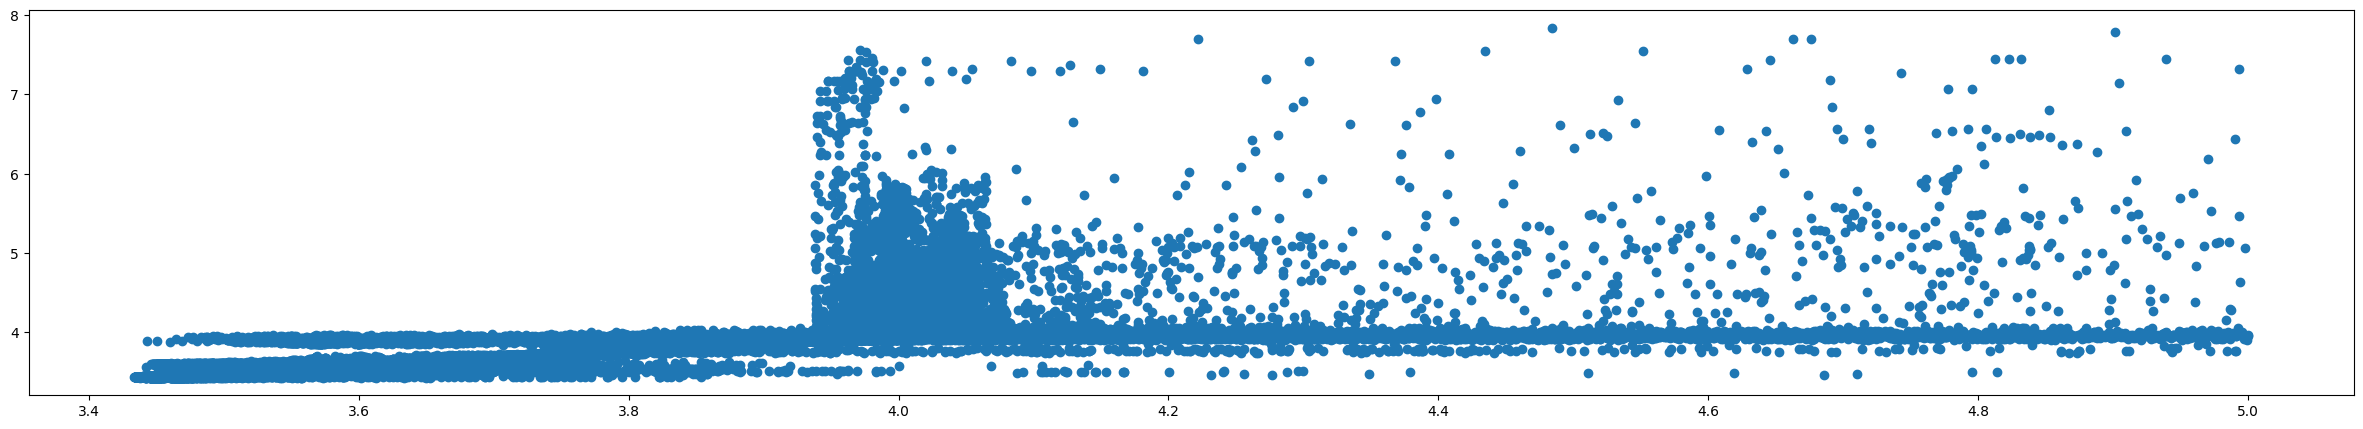

In [40]:
plt.scatter(depth[(mask>0) & (depth<5000)]/1000, gt[(mask>0) & (depth<5000)]/100)

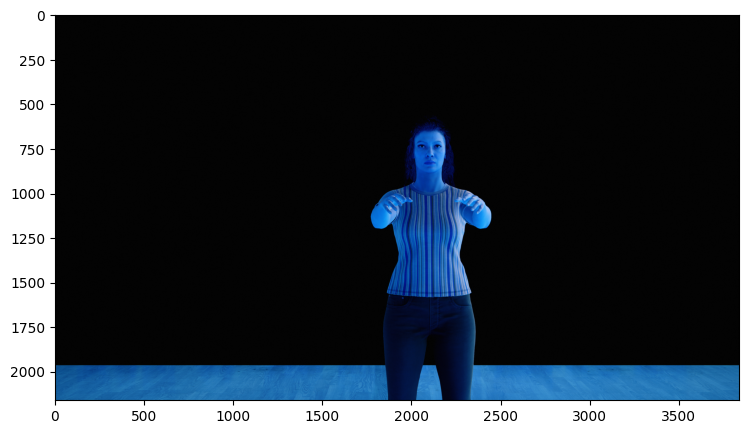

In [80]:
img_l= cv2.imread(f'../../data/stereo/pose_z_4m/rgb/Camera_{camera_id_l}_RGB.png')
plt.imshow(img_l)

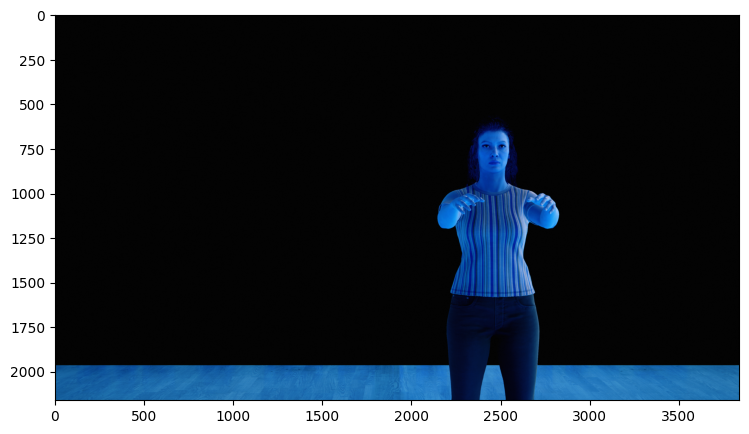

In [81]:
plt.imshow(img_r)

In [97]:
250 * focal_length / 400

3535.353955017779

In [92]:
camera_data_r.world_pos()

(37.5, 125, 400)

In [15]:
focal_length * baseline / 430

3288.7013535049105

(array([4.47500e+04, 5.82343e+05, 2.22500e+03, 1.24000e+03, 7.73000e+02,
        7.36000e+02, 5.40000e+02, 3.79000e+02, 3.54000e+02, 4.17000e+02,
        3.29000e+02, 3.07000e+02, 2.54000e+02, 1.93000e+02, 1.64000e+02,
        1.70000e+02, 1.57000e+02, 1.52000e+02, 1.20000e+02, 1.45000e+02,
        1.25000e+02, 1.21000e+02, 1.09000e+02, 9.00000e+01, 1.20000e+02,
        7.40000e+01, 7.90000e+01, 7.20000e+01, 7.40000e+01, 7.40000e+01,
        7.20000e+01, 7.00000e+01, 7.30000e+01, 7.20000e+01, 8.00000e+01,
        8.40000e+01, 8.50000e+01, 9.30000e+01, 1.28000e+02, 1.61000e+02,
        1.34000e+02, 1.33000e+02, 1.26000e+02, 1.24000e+02, 9.10000e+01,
        1.02000e+02, 8.90000e+01, 9.10000e+01, 1.10000e+02, 8.60000e+01,
        1.05000e+02, 8.70000e+01, 7.40000e+01, 7.50000e+01, 7.20000e+01,
        8.00000e+01, 1.03000e+02, 9.00000e+01, 1.04000e+02, 6.90000e+01,
        1.06000e+02, 1.20000e+02, 1.38000e+02, 1.69000e+02, 1.56000e+02,
        1.39000e+02, 1.98000e+02, 2.26000e+02, 2.31

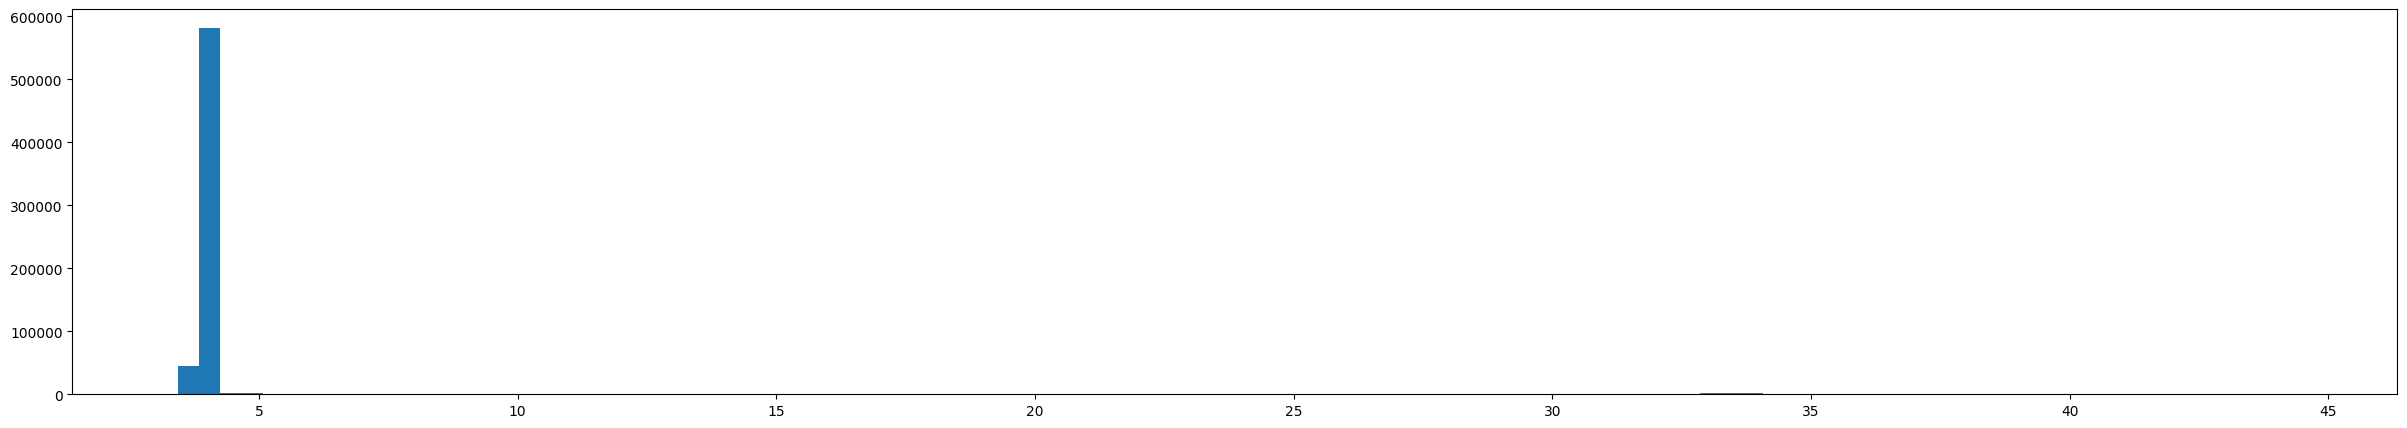

In [18]:
plt.hist(depth[mask>0]/1000, bins=100)

In [19]:
camera_data_r.cam_data

{'Camera World Position': {'X': 400, 'Y': 37.5, 'Z': 125},
 'Camera World Rotation': {'P': 0, 'Y': 180, 'R': 0},
 'Filmback': {'SensorWidth (mm)': 23.760000228881836,
  'SensorHeight (mm)': 13.364999771118164,
  'SensorAspectRatio': 1.7777777910232544},
 'Lens': {'MinFocalLength (mm)': 4,
  'MaxFocalLength (mm)': 1000,
  'Horizontal Field of View (degrees)': 37.49735641479492},
 'Other': {'Near Clip Plane (cm)': 0.10000000149011612,
  'Far Clip Plane (cm)': 800}}